In [51]:
import numpy as np
import pandas as pd

In [52]:
df = pd.read_csv('Dataset/dataset.csv')




In [53]:
df.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0,f309bce7-7485-4c94-9853-efe16b49200f,nguyen tat dat mai,https://play-lh.googleusercontent.com/a-/AD_cM...,Update xong tìm quanh đây không dùng được nữa....,1,25,19.01.02.medium,2023-06-24 08:44:24,"Chào bạn, hiện tại tính năng này Zalo đang tạm...",2020-09-04 15:52:40,19.01.02.medium
1,1,c7c762a4-e60a-40af-ae3b-c8005fb87e49,Harrier,https://play-lh.googleusercontent.com/a-/AD_cM...,Tính năng liên quan đến số tài khoản ngân hàng...,1,0,23.05.02,2023-06-24 08:32:36,NaN,NaN,23.05.02
2,2,a88a748b-4f11-42de-a536-44e7ddc8659a,Leo 2_1,https://play-lh.googleusercontent.com/a/AAcHTt...,Khi truy cập vào báo rất lag không truy cập được,2,0,23.05.02,2023-06-23 21:39:50,NaN,NaN,23.05.02
3,3,6c243ea9-65ca-40f7-9d68-49a2a6158939,စိုး ေအာင္,https://play-lh.googleusercontent.com/a/AAcHTt...,good for me before,3,0,NaN,2023-06-23 17:05:23,NaN,NaN,NaN
4,4,60c2a70c-8384-4a74-ae6e-b5178ae6944b,Huyền Thanh,https://play-lh.googleusercontent.com/a/AAcHTt...,Không an toàn. Zalo bị phát hiện sử dụng máy ả...,1,0,NaN,2023-06-23 15:35:30,"Chào bạn. Để tiện hỗ trợ bạn hơn, bạn vui lòng...",2023-06-23 15:52:47,NaN


In [54]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

# Torch ML libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

# Misc.
import warnings
warnings.filterwarnings('ignore')


In [55]:
# Set intial variables and constants
%config InlineBackend.figure_format='retina'

# Graph Designs
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

# Random seed for reproducibilty
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

# Set GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [56]:
# Function to convert score to sentiment
def to_sentiment(rating):
    
    rating = int(rating)
    
    # Convert to class
    if rating <= 2:
        return 0
    elif rating == 3:
        return 1
    else:
        return 2



In [57]:
# Apply to the dataset 
df['sentiment'] = df.score.apply(to_sentiment)


In [58]:
df.head(100)

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sentiment
0,0,f309bce7-7485-4c94-9853-efe16b49200f,nguyen tat dat mai,https://play-lh.googleusercontent.com/a-/AD_cM...,Update xong tìm quanh đây không dùng được nữa....,1,25,19.01.02.medium,2023-06-24 08:44:24,"Chào bạn, hiện tại tính năng này Zalo đang tạm...",2020-09-04 15:52:40,19.01.02.medium,0
1,1,c7c762a4-e60a-40af-ae3b-c8005fb87e49,Harrier,https://play-lh.googleusercontent.com/a-/AD_cM...,Tính năng liên quan đến số tài khoản ngân hàng...,1,0,23.05.02,2023-06-24 08:32:36,NaN,NaN,23.05.02,0
2,2,a88a748b-4f11-42de-a536-44e7ddc8659a,Leo 2_1,https://play-lh.googleusercontent.com/a/AAcHTt...,Khi truy cập vào báo rất lag không truy cập được,2,0,23.05.02,2023-06-23 21:39:50,NaN,NaN,23.05.02,0
3,3,6c243ea9-65ca-40f7-9d68-49a2a6158939,စိုး ေအာင္,https://play-lh.googleusercontent.com/a/AAcHTt...,good for me before,3,0,NaN,2023-06-23 17:05:23,NaN,NaN,NaN,1
4,4,60c2a70c-8384-4a74-ae6e-b5178ae6944b,Huyền Thanh,https://play-lh.googleusercontent.com/a/AAcHTt...,Không an toàn. Zalo bị phát hiện sử dụng máy ả...,1,0,NaN,2023-06-23 15:35:30,"Chào bạn. Để tiện hỗ trợ bạn hơn, bạn vui lòng...",2023-06-23 15:52:47,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,e6a705e2-9fb8-472c-95aa-fe7f9ac01349,Dj Dj,https://play-lh.googleusercontent.com/a/AAcHTt...,You,5,0,23.04.01,2023-05-26 10:42:48,NaN,NaN,23.04.01,2
96,96,68da3925-9c6f-4b2e-b24f-029d429a7f5b,HOI NGUYEN,https://play-lh.googleusercontent.com/a/AAcHTt...,Zalo có thể tắt tính năng thông báo sinh nhật ...,4,1,23.04.01,2023-05-26 09:34:58,Chào bạn. Chúng tôi sẽ ghi nhận và xem xét ý k...,2023-05-26 15:24:23,23.04.01,2
97,97,9987af2c-5cde-43b2-a163-7aea8584ba8e,VINH NGUYEN PHAT,https://play-lh.googleusercontent.com/a-/AD_cM...,Perfect,5,0,NaN,2023-05-25 21:27:30,NaN,NaN,NaN,2
98,98,c1188bcd-6e1e-4045-b8f1-eb14fd9fdd9c,TRAN NHA THUY LINH,https://play-lh.googleusercontent.com/a-/AD_cM...,Thân chào! Zalo app tình hình chung rất tốt 5 ...,5,0,23.04.01,2023-05-25 11:07:05,Chào bạn. Chúng tôi sẽ ghi nhận và xem xét ý k...,2023-05-25 16:17:33,23.04.01,2


In [59]:
df.sentiment.value_counts()

0    478
2    283
1     47
Name: sentiment, dtype: int64

In [60]:
df.dtypes

Unnamed: 0               int64
reviewId                object
userName                object
userImage               object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
appVersion              object
sentiment                int64
dtype: object

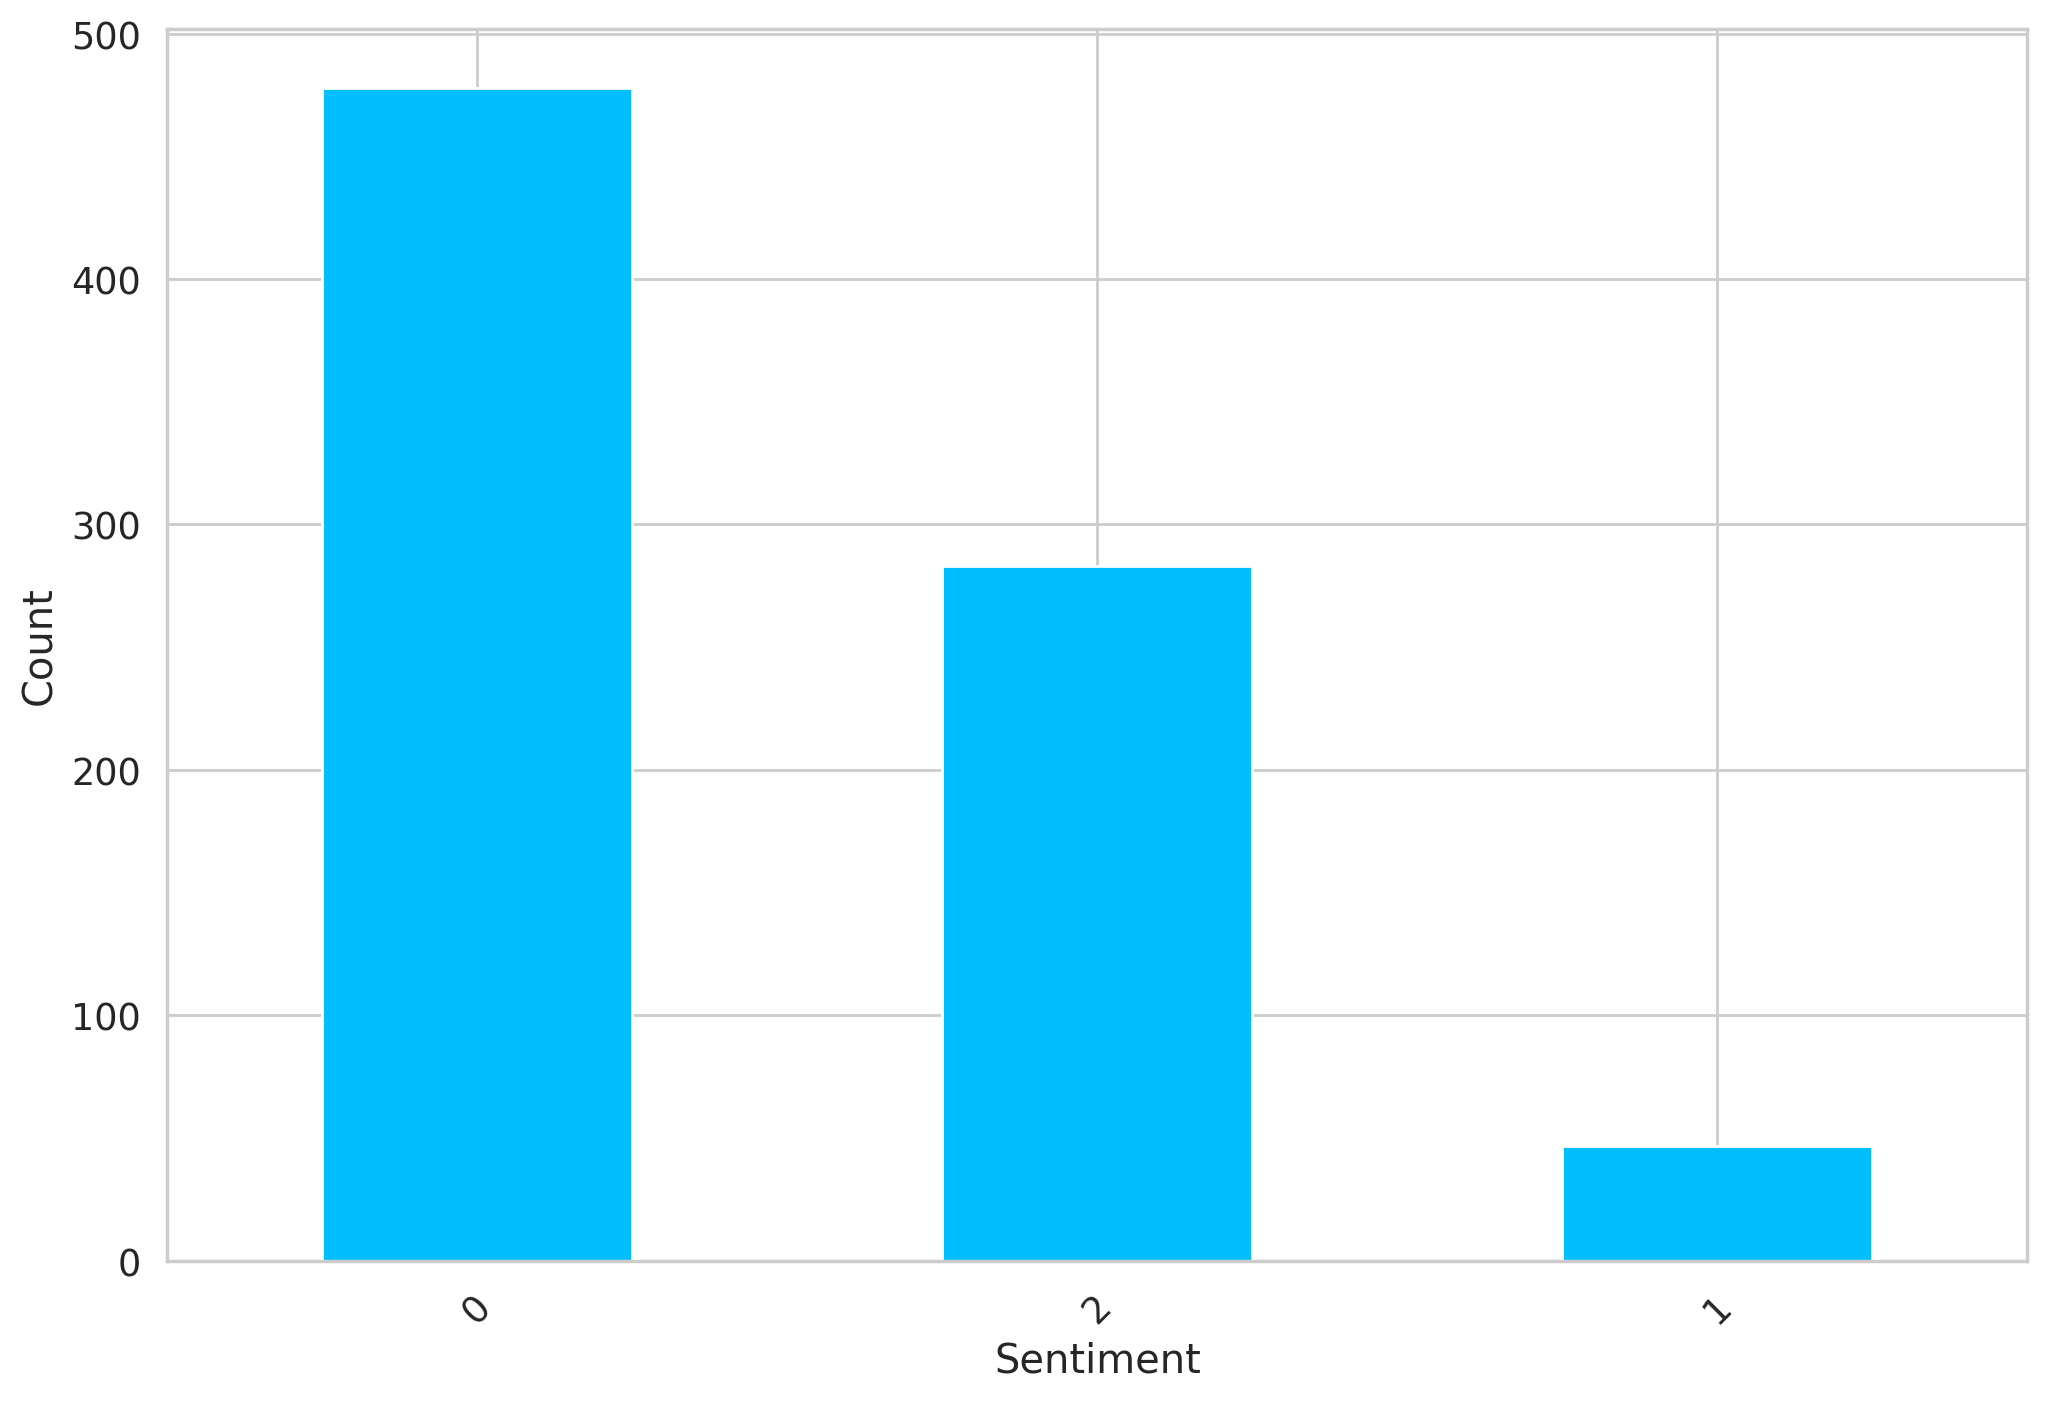

In [61]:
# Plot the distribution
class_names = ['negative', 'neutral', 'positive']
df.sentiment.value_counts().plot(kind= 'bar', y = class_names)
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.show()


In [62]:
import torch
from transformers import RobertaForSequenceClassification, AutoTokenizer


In [63]:
# Set the model name
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2")


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [64]:
# Some of the common BERT tokens
print(tokenizer.sep_token, tokenizer.sep_token_id) # marker for ending of a sentence
print(tokenizer.cls_token, tokenizer.cls_token_id) # start of each sentence, so BERT knows we’re doing classification
print(tokenizer.pad_token, tokenizer.pad_token_id) # special token for padding
print(tokenizer.unk_token, tokenizer.unk_token_id) # tokens not found in training set 


</s> 2
<s> 0
<pad> 1
<unk> 3


In [65]:
df = df.dropna(subset=['content'])


In [66]:
# Store length of each review 
token_lens = []

# Iterate through the content slide
for txt in df.content:
    
    tokens = tokenizer.encode_plus(txt, padding="max_length", truncation=True, max_length=160, return_tensors="pt")
    token_lens.append(len(tokens))


Text(0.5, 0, 'Token count')

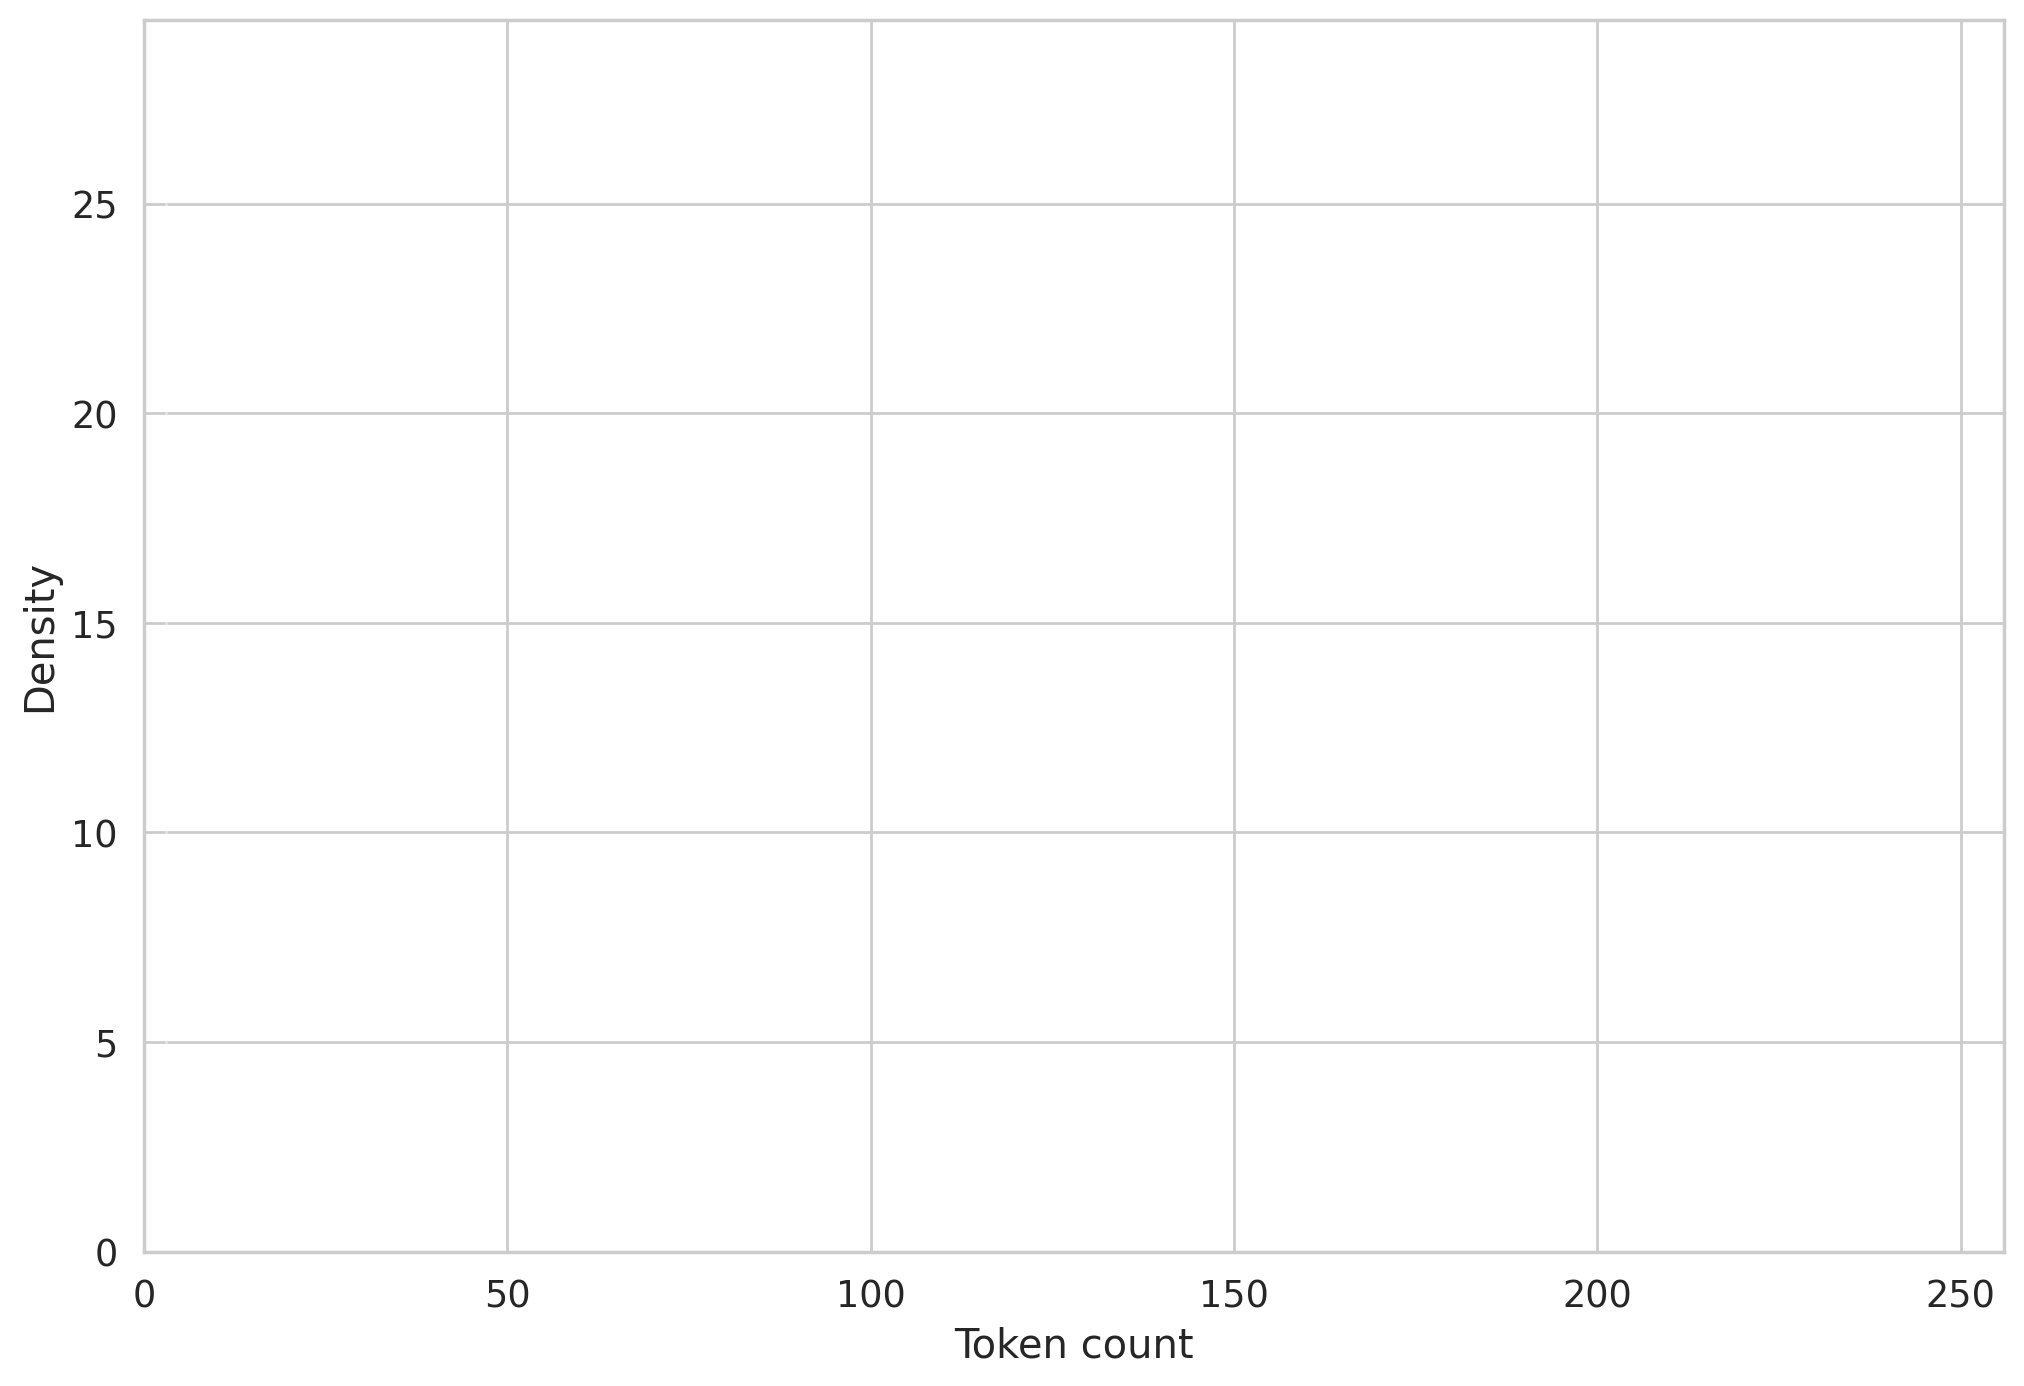

In [67]:
# plot the distribution of review lengths 
sns.distplot(token_lens)
plt.xlim([0, 256])
plt.xlabel('Token count')


In [68]:
MAX_LEN = 160


In [69]:
class GPReviewDataset(Dataset):
    # Constructor Function 
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    # Length magic method
    def __len__(self):
        return len(self.reviews)
    
    # get item magic method
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]
        
        # Encoded format to be returned 
        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }


In [70]:
RANDOM_SEED = 10

In [71]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

print(df_train.shape, df_val.shape, df_test.shape)


(645, 13) (81, 13) (81, 13)


In [72]:
def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = GPReviewDataset(
        reviews=df.content.to_numpy(),
        targets=df.sentiment.to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )
    
    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=0
    )


In [73]:
# Create train, test and val data loaders
BATCH_SIZE = 16
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)


In [74]:
# Examples 
data = next(iter(train_data_loader))
print(data.keys())

print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])
torch.Size([16, 160])
torch.Size([16, 160])
torch.Size([16])


In [75]:
from transformers import AutoModel, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [76]:
n_classes = 3

In [77]:
class SentimentClassifier(nn.Module):
    def __init__(self, n_classes):
        super(SentimentClassifier, self).__init__()
        self.phobert = AutoModel.from_pretrained("vinai/phobert-base")
        self.dropout = nn.Dropout(0.3)
        self.linear = nn.Linear(self.phobert.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.phobert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.linear(pooled_output)
        return logits


In [78]:
class_names

['negative', 'neutral', 'positive']

In [79]:
# Instantiate the model and move to classifier
model = SentimentClassifier(len(class_names))
model = model.to(device)


Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [80]:
# Number of iterations 
EPOCHS = 1

# Optimizer Adam 
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)

total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Set the loss function 
loss_fn = nn.CrossEntropyLoss().to(device)


In [81]:
model

SentimentClassifier(
  (phobert): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(64001, 768, padding_idx=1)
      (position_embeddings): Embedding(258, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm):

In [82]:
model = model.to(device)


In [83]:
# Function for a single training iteration
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0
    
    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)


        outputs = model(
            input_ids = input_ids,
            attention_mask=attention_mask
        )
        
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets)
        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())
        
        # Backward prop
        loss.backward()
        
        # Gradient Descent
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
    
    return correct_predictions.double() / n_examples, np.mean(losses)

In [84]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    
    losses = []
    correct_predictions = 0
    
    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)
            
            # Get model ouptuts
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            
            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, targets)
            
            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())
            
    return correct_predictions.double() / n_examples, np.mean(losses)


In [85]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):
    
    # Show details 
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    print("-" * 10)
    
    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df_train)
    )
    
    print(f"Train loss {train_loss} accuracy {train_acc}")
    
    # Get model performance (accuracy and loss)
    val_acc, val_loss = eval_model(
        model,
        val_data_loader,
        loss_fn,
        device,
        len(df_val)
    )
    
    print(f"Val   loss {val_loss} accuracy {val_acc}")
    print()
    
    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)
    
    # If we beat prev performance
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_accuracy = val_acc

Epoch 1/1
----------
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size([16, 160])
targets
torch.Size(